<a href="https://colab.research.google.com/github/ArtemBaskal/ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Red Wine Quality

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


Notebook contains such parts as:

1. Loading the dataset and checking its correctness.
	
2. Basic EDA (Exploratory Data Analysis). What are the features? How are they distributed?
	
3. Any kind of cross-validation (train/test split). You may use K-Fold or any other procedure.
	
4. Training the model.
	
5. Any way of tuning hyper-parameters (trying a few ones is OK).
	
6. Evaluating the trained model. Is it good enough?
	
7. Some suggestions of next steps. What would you do given more time?


In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (7).csv


# 1. Loading the dataset and checking its correctness.

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['winequality-red.csv'].decode('utf-8')), error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe() # Generate the summary table of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.dtypes # Check the data types of all columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.isnull().sum() # Check if there's any missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2. Basic EDA (Exploratory Data Analysis).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


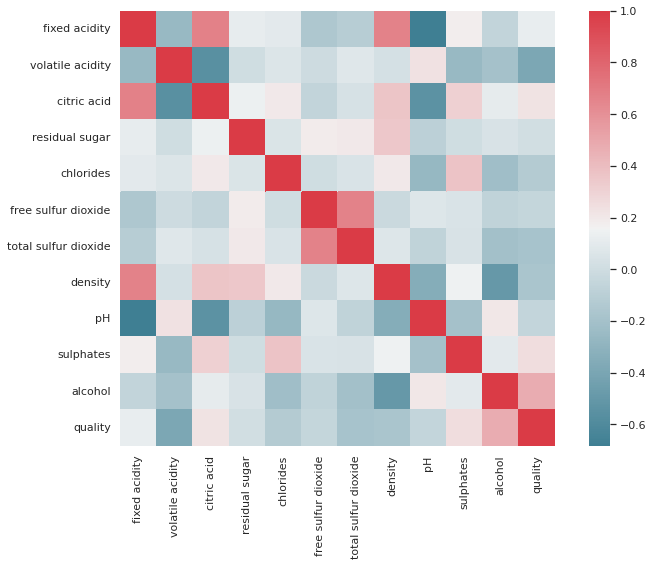

In [ ]:
fig = plt.gcf()
corr = df.corr()
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to dec

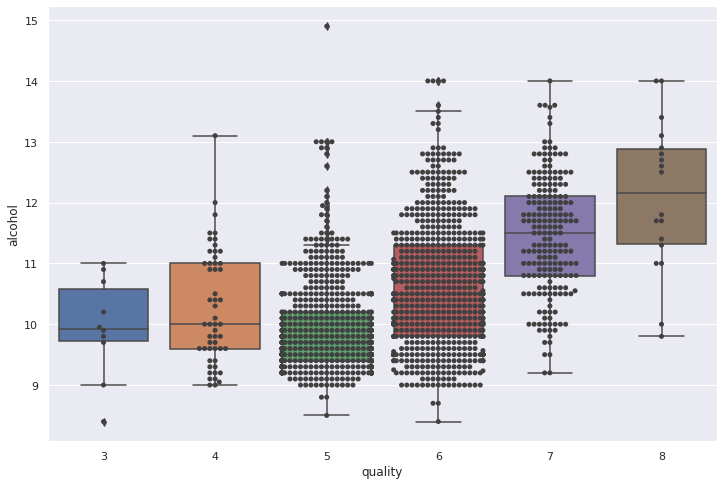

In [ ]:
sns.boxplot("quality", "alcohol", data=df)
sns.swarmplot("quality", "alcohol", data=df, color=".25")
# We can see that dataset is imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


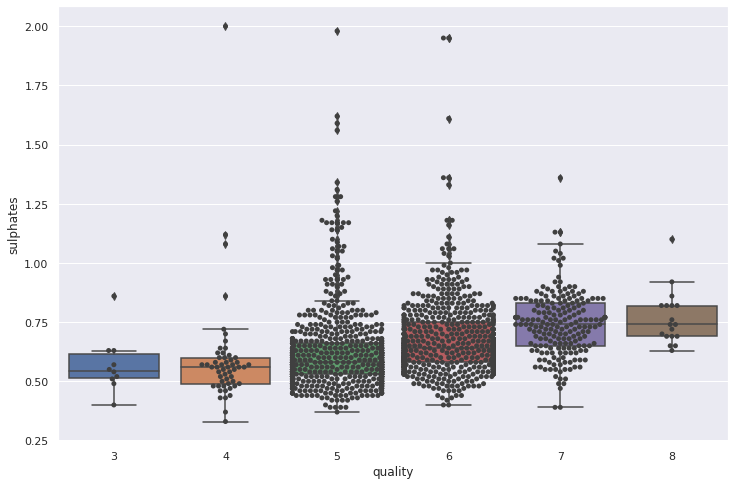

In [ ]:
sns.boxplot(x="quality", y="sulphates", data=df)
sns.swarmplot(x="quality", y="sulphates", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


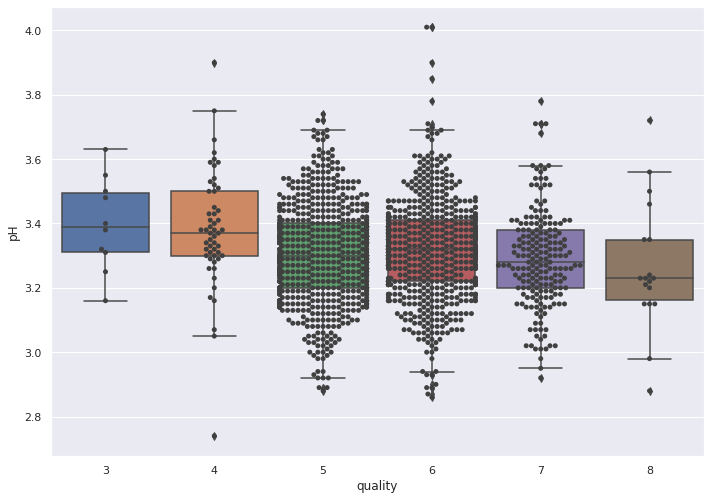

In [ ]:
sns.boxplot(x="quality", y="pH", data=df)
sns.swarmplot(x="quality", y="pH", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


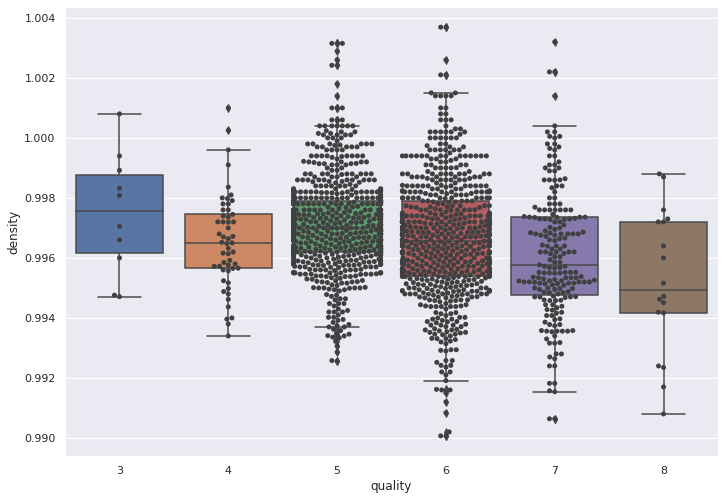

In [ ]:
sns.boxplot(x="quality", y="density", data=df)
sns.swarmplot(x="quality", y="density", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


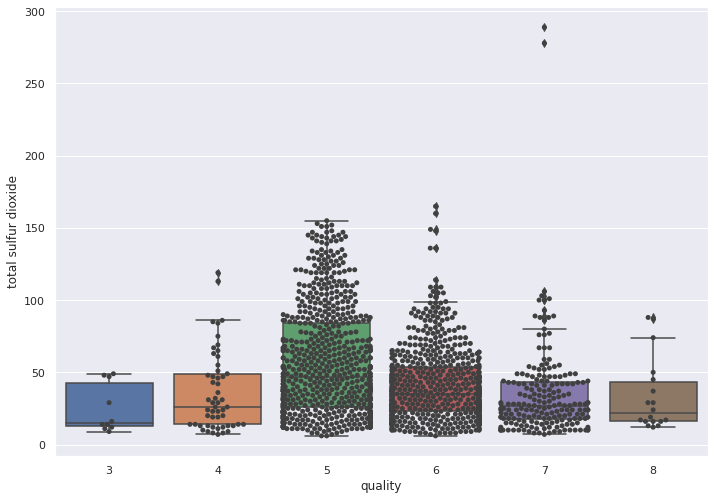

In [ ]:
sns.boxplot(x="quality", y="total sulfur dioxide", data=df)
sns.swarmplot(x="quality", y="total sulfur dioxide", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


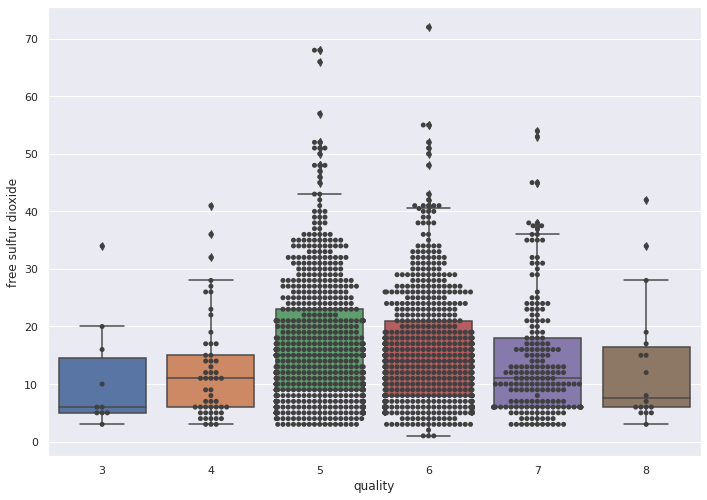

In [ ]:
sns.boxplot(x="quality", y="free sulfur dioxide", data=df)
sns.swarmplot(x="quality", y="free sulfur dioxide", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


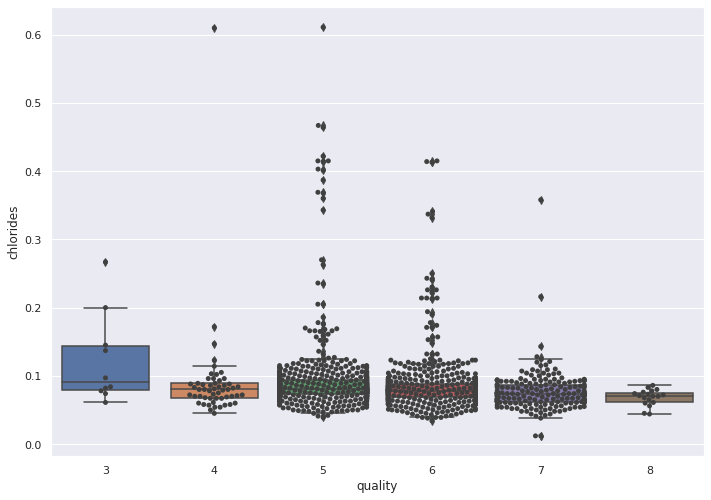

In [ ]:
sns.boxplot(x="quality", y="chlorides", data=df)
sns.swarmplot(x="quality", y="chlorides", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


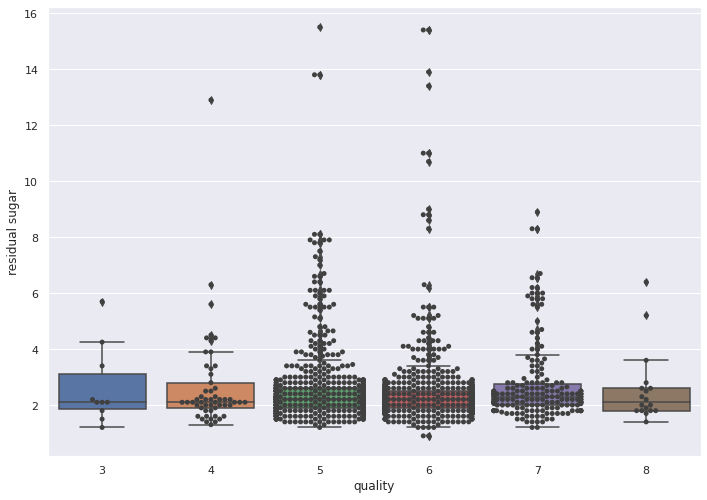

In [ ]:
sns.boxplot(x="quality", y="residual sugar", data=df)
sns.swarmplot(x="quality", y="residual sugar", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


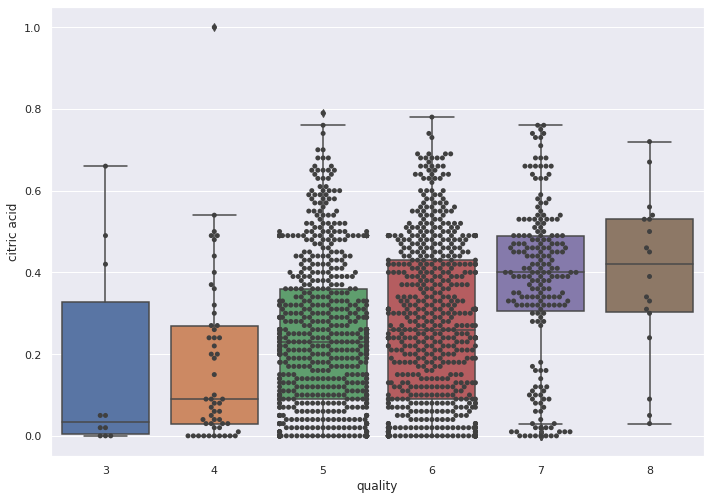

In [ ]:
sns.boxplot(x="quality", y="citric acid", data=df)
sns.swarmplot(x="quality", y="citric acid", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


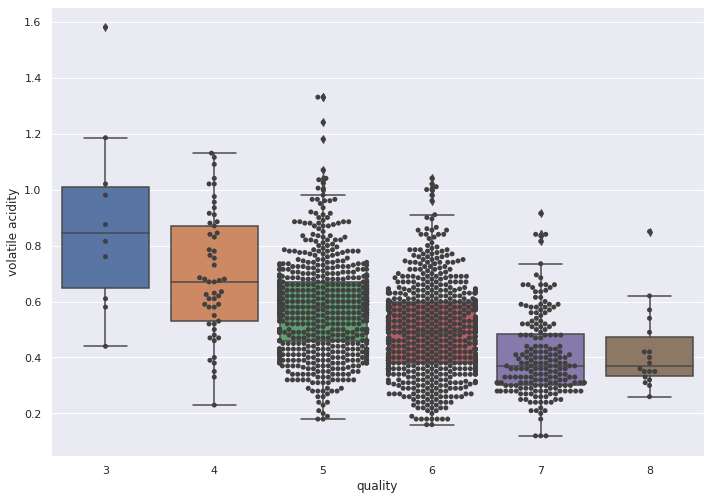

In [ ]:
sns.boxplot(x="quality", y="volatile acidity", data=df)
sns.swarmplot(x="quality", y="volatile acidity", data=df, color=".25")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


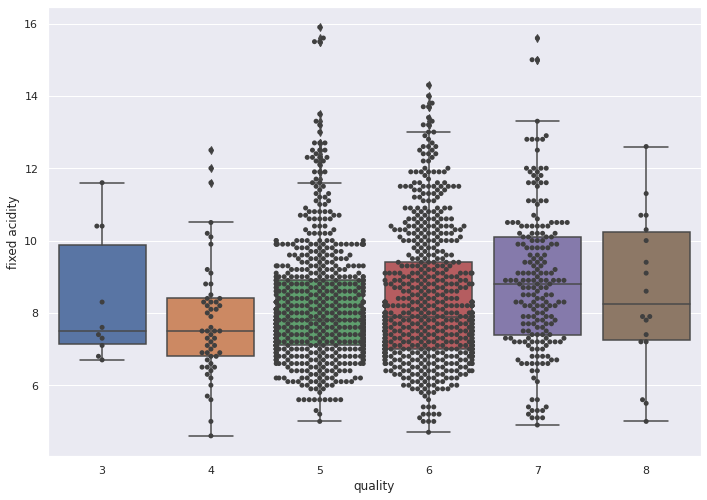

In [ ]:
sns.boxplot(x="quality", y="fixed acidity", data=df)
sns.swarmplot(x="quality", y="fixed acidity", data=df, color=".25")

There are a lot of outliers for different columns, except citric acid. Alcohol, sulphates and citric acid are positively correlated with wine quality.

# 3. Сross-validation (train/test split).

In [ ]:
label = df.quality.values
df.drop(['quality'], axis=1, inplace=True)

In [ ]:
# Split the Data into 75% - 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.25, random_state = 42)

# 4. Training the model.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada = GridSearchCV(model, parameters, refit=True)
grad_Ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4)),
             param_grid={'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
                         'n_estimators': [10, 50, 100, 200]})

#5. Tuning hyper-parameters.

In [ ]:
model2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3))

parameters2 = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada2 = GridSearchCV(model, parameters, refit=True)
grad_Ada2.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4)),
             param_grid={'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
                         'n_estimators': [10, 50, 100, 200]})

# 6. Evaluating the trained model.

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
pred_adaboost = grad_Ada.predict(X_test)

# Check Model Score
print('Residual sum of squares: ',  np.mean((pred_adaboost - y_test) ** 2))
print('MSE: '+str(mean_squared_error(y_test, pred_adaboost)))
print('Model Score on Test Data: ', grad_Ada.score(X_test, y_test))
print('\n')

Residual sum of squares:  0.37990512481814703
MSE: 0.37990512481814703
Model Score on Test Data:  0.3858568328274461




In [ ]:
pred_adaboost2 = grad_Ada2.predict(X_test)

# Check Model Score
print('Residual sum of squares: ',  np.mean((pred_adaboost2 - y_test) ** 2))
print('MSE: '+str(mean_squared_error(y_test, pred_adaboost2)))
print('Model Score on Test Data: ', grad_Ada2.score(X_test, y_test))
# Model Score increased

Residual sum of squares:  0.370300788449968
MSE: 0.370300788449968
Model Score on Test Data:  0.40138291334180465


#7. Some suggestions of next steps. What would you do given more time?

* Deal with dataset imbalance
* Use different methods to deal with outliers (oversampling or undersampling etc.)